In [1]:
#Defining local path 
your_local_path="C:/Users/nlakshman/Desktop/Grab Challenge/Traffic Management/"

In [2]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
#Reading input file
traf_mgmt_file=your_local_path+'training.csv'
print(traf_mgmt_file)
traf_mgmt_data=pd.read_csv(traf_mgmt_file)
#Head of input
traf_mgmt_data.head()

C:/Users/nlakshman/Desktop/Grab Challenge/Traffic Management/training.csv


,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [20]:
#Converting Geohash to its respective Latitude and Longitude
import geohash2 as pgh
traf_mgmt_data['latlong']=traf_mgmt_data['geohash6'].apply(lambda x:pgh.decode(x))
traf_mgmt_data.tail()

,geohash6,day,timestamp,demand,latlong
4206316,qp03y1,39,13:0,0.012731,"(-5.31, 90.6)"
4206317,qp097e,23,18:45,0.083179,"(-5.39, 90.9)"
4206318,qp03m6,32,12:15,0.123260,"(-5.39, 90.6)"
4206319,qp02zv,42,5:15,0.120100,"(-5.46, 90.7)"
4206320,qp03yv,15,4:0,0.042656,"(-5.29, 90.7)"


In [21]:
#Splitting the latitude and longitude
traf_mgmt_data[['lat','long']]=pd.DataFrame(traf_mgmt_data['latlong'].tolist(),index=traf_mgmt_data.index)
traf_mgmt_data.tail()

,geohash6,day,timestamp,demand,latlong,lat,long
4206316,qp03y1,39,13:0,0.012731,"(-5.31, 90.6)",-5.31,90.6
4206317,qp097e,23,18:45,0.083179,"(-5.39, 90.9)",-5.39,90.9
4206318,qp03m6,32,12:15,0.123260,"(-5.39, 90.6)",-5.39,90.6
4206319,qp02zv,42,5:15,0.120100,"(-5.46, 90.7)",-5.46,90.7
4206320,qp03yv,15,4:0,0.042656,"(-5.29, 90.7)",-5.29,90.7


In [24]:
#Identifying the unique latlong, geohash6 points
unique_geohash6=traf_mgmt_data['geohash6'].unique().tolist()
unique_latlong=traf_mgmt_data['latlong'].unique().tolist()
print('latlong:', len(traf_mgmt_data['latlong'].unique()))
print('unique geohash6:', len(traf_mgmt_data['geohash6'].unique()))

latlong: 116
unique geohash6: 1329


In [26]:
#converting the coordinates as radians
rad=lambda x:np.radians(float(x))
traf_mgmt_data['radlat']=traf_mgmt_data['lat'].apply(rad)
traf_mgmt_data['radlong']=traf_mgmt_data['long'].apply(rad)

In [27]:
#traf_mgmt_data=traf_mgmt_data.set_index(['latlong'])
traf_mgmt_data.head()

,geohash6,day,timestamp,demand,lat,long,radlat,radlong
latlong,,,,,,,,
"(-5.35, 90.7)",qp03wc,18,20:0,0.020072,-5.35,90.7,-0.093375,1.583014
"(-5.41, 90.7)",qp03pn,10,14:30,0.024721,-5.41,90.7,-0.094422,1.583014
"(-5.33, 90.9)",qp09sw,9,6:15,0.102821,-5.33,90.9,-0.093026,1.586504
"(-5.35, 90.8)",qp0991,32,5:0,0.088755,-5.35,90.8,-0.093375,1.584759
"(-5.41, 90.7)",qp090q,15,4:0,0.074468,-5.41,90.7,-0.094422,1.583014


In [34]:
traf_mgmt_datagrp=traf_mgmt_data.groupby(traf_mgmt_data.index).mean()
traf_mgmt_datagrp

,day,demand,radlat,radlong
latlong,,,,
"(-5.24, 90.6)",30.541599,0.004986,-0.091455,1.581268
"(-5.24, 90.7)",31.617903,0.015804,-0.091455,1.583014
"(-5.24, 90.8)",32.062442,0.059021,-0.091455,1.584759
"(-5.24, 90.9)",31.725791,0.052884,-0.091455,1.586504
"(-5.24, 91.)",32.565235,0.014024,-0.091455,1.588250
"(-5.25, 90.6)",32.362288,0.009468,-0.091630,1.581268
"(-5.25, 90.7)",31.334254,0.034504,-0.091630,1.583014
"(-5.25, 90.8)",32.074663,0.055285,-0.091630,1.584759
"(-5.25, 90.9)",31.966352,0.053633,-0.091630,1.586504


In [37]:
traf_mgmt_datagrp.describe()

,day,demand,radlat,radlong
count,116.000000,116.000000,116.000000,116.000000
mean,32.142459,0.073534,-0.093417,1.584849
std,2.048094,0.067806,0.001211,0.002379
min,29.074558,0.004986,-0.095644,1.581268
25%,31.138455,0.028310,-0.094422,1.583014
50%,31.600468,0.055806,-0.093375,1.584759
75%,32.061767,0.100596,-0.092328,1.586504
max,42.853448,0.388203,-0.091455,1.588250


In [ ]:
#From Describe, max(demand)=0.388203
#min(demand)=0.004986
#From the histogram, only 4 Lat/Long points have high demand, >0.25

(array([ 44.,  36.,  16.,   8.,   5.,   3.,   1.,   1.,   1.,   1.]),
 array([ 0.00498619,  0.04330788,  0.08162956,  0.11995124,  0.15827292,
         0.1965946 ,  0.23491629,  0.27323797,  0.31155965,  0.34988133,
         0.38820302]),
 <a list of 10 Patch objects>)

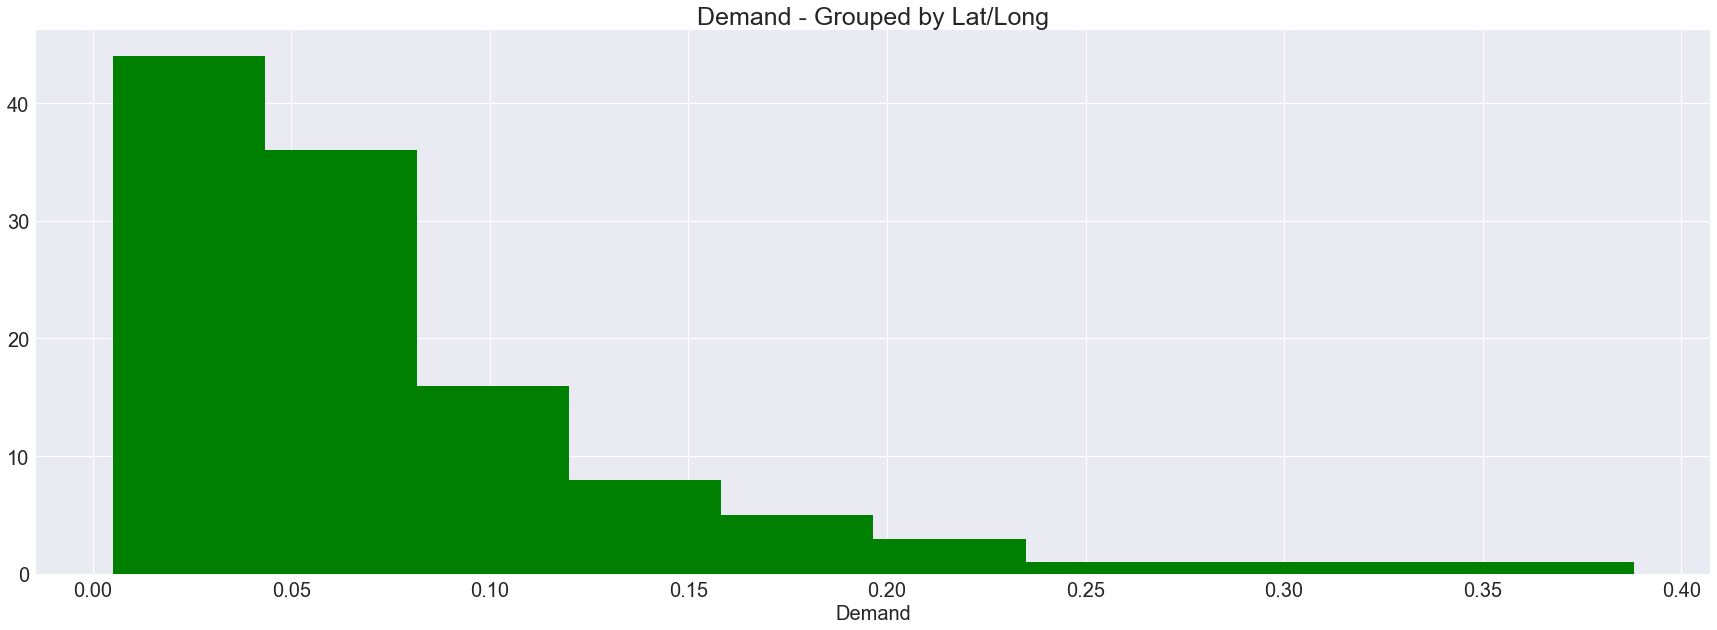

In [43]:
#Plotting the demands grouped by Lat/Long
plt.figure(figsize=(30,10))
plt.title('Demand - Grouped by Lat/Long',fontsize=25)
plt.xlabel('Demand',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.hist(traf_mgmt_datagrp['demand'],color='green')

In [49]:
#Getting the Latitude /Longitude points of high demand
#categorizing demand>0.2 as high
#Only few area are with high demand and are below
high_demand_space=traf_mgmt_datagrp[traf_mgmt_datagrp['demand']>0.2]
high_demand_space

,day,demand,radlat,radlong
latlong,,,,
"(-5.31, 90.7)",31.060601,0.215099,-0.092677,1.583014
"(-5.32, 90.7)",31.037484,0.388203,-0.092852,1.583014
"(-5.33, 90.7)",31.024349,0.319457,-0.093026,1.583014
"(-5.34, 90.7)",31.104074,0.214443,-0.093201,1.583014
"(-5.35, 90.8)",31.318939,0.219795,-0.093375,1.584759
"(-5.36, 90.8)",31.255359,0.301447,-0.093550,1.584759
"(-5.37, 90.8)",31.145181,0.234987,-0.093724,1.584759
